In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/simonbruun-simonsen/Desktop/ML-project/data/claims_train.csv")

df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,2122523.0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,3173420.0,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,1188619.0,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,31400.0,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,3138755.0,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53
...,...,...,...,...,...,...,...,...,...,...,...,...
542405,2063494.0,0,0.20,D,6,10,32,76,B2,Diesel,1314,R24
542406,4164964.0,0,0.06,D,10,14,34,60,B5,Diesel,685,R72
542407,3078112.0,0,0.34,C,6,8,32,95,B5,Diesel,242,R82
542408,1012927.0,0,0.72,E,9,7,39,72,B2,Regular,3301,R73


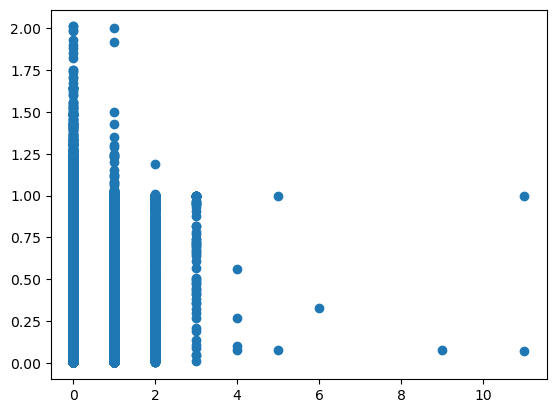

In [13]:
import seaborn as sns

df["IDpol"].value_counts()
df["ClaimNb"].value_counts()

plt.scatter(df["ClaimNb"],df["Exposure"])

In [16]:
df = df.drop("IDpol", axis=1)


KeyError: "['IDpol'] not found in axis"

In [19]:
df = df.dropna()


,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53
...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,D,6,10,32,76,B2,Diesel,1314,R24
542406,0,0.06,D,10,14,34,60,B5,Diesel,685,R72
542407,0,0.34,C,6,8,32,95,B5,Diesel,242,R82
542408,0,0.72,E,9,7,39,72,B2,Regular,3301,R73


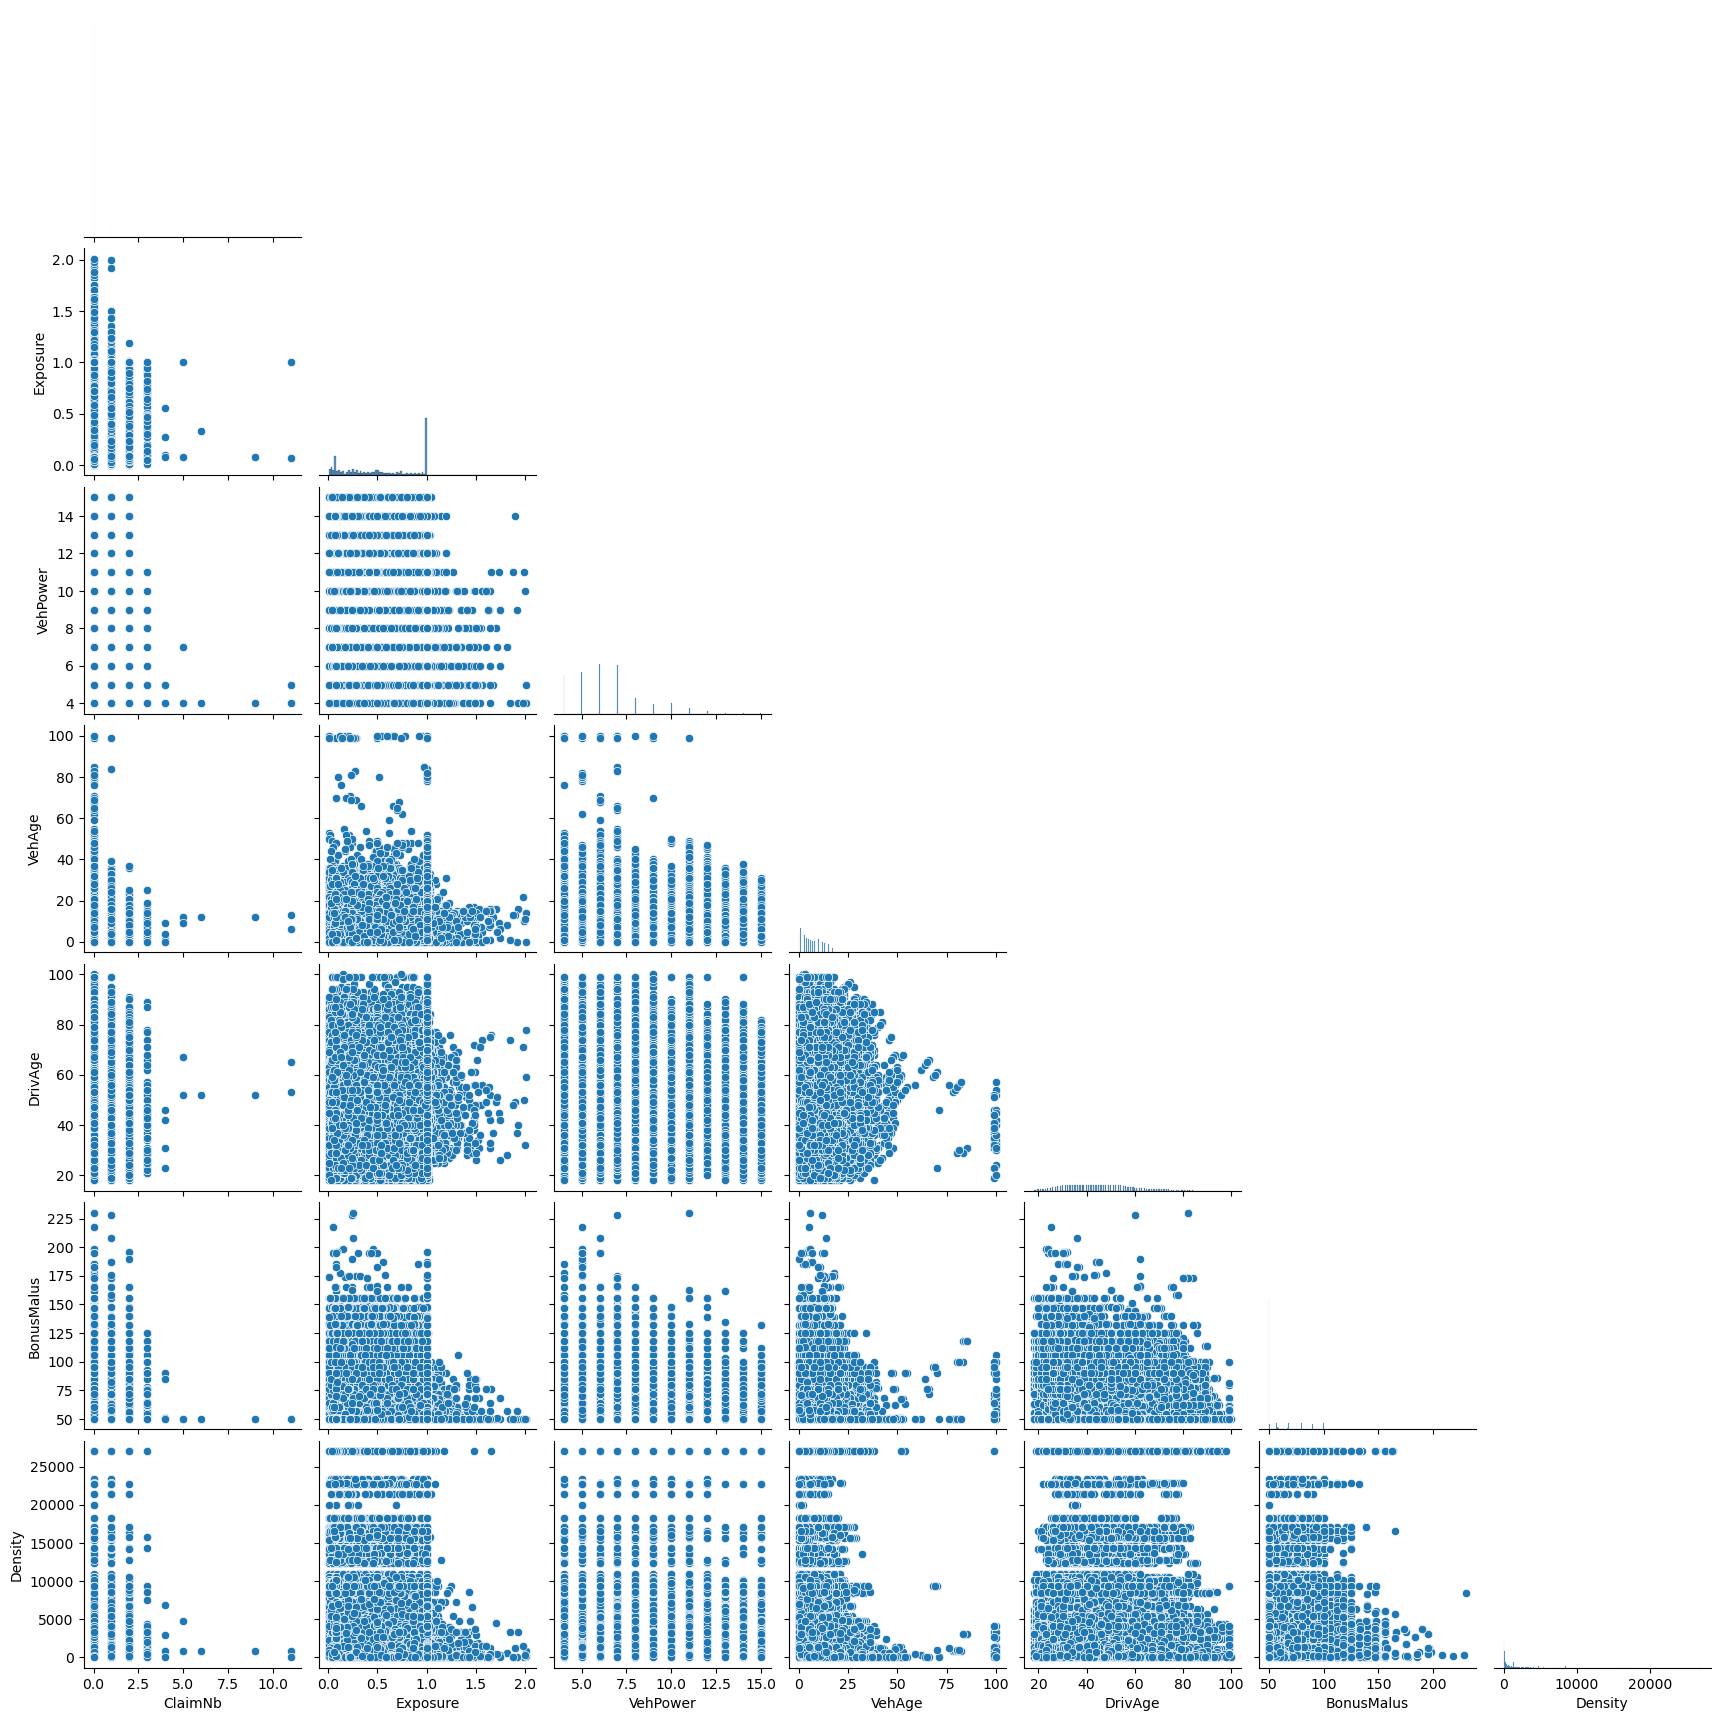

In [21]:
sns.pairplot(df,corner=True)

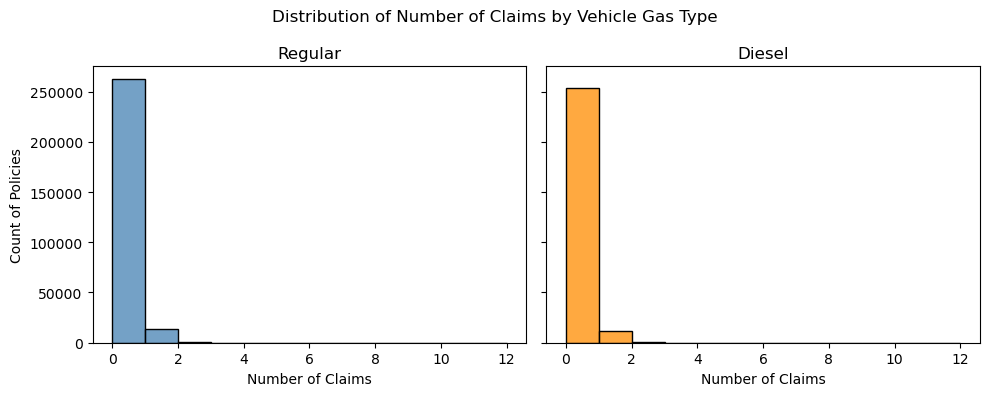

In [28]:




fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Regular
sns.histplot(
    data=df[df["VehGas"] == "Regular"],
    x="ClaimNb",
    bins=range(0, df["ClaimNb"].max() + 2),
    color="steelblue",
    ax=axes[0]
)
axes[0].set_title("Regular")
axes[0].set_xlabel("Number of Claims")
axes[0].set_ylabel("Count of Policies")

# Diesel
sns.histplot(
    data=df[df["VehGas"] == "Diesel"],
    x="ClaimNb",
    bins=range(0, df["ClaimNb"].max() + 2),
    color="darkorange",
    ax=axes[1]
)
axes[1].set_title("Diesel")
axes[1].set_xlabel("Number of Claims")
axes[1].set_ylabel("")

# Overall title and layout
fig.suptitle("Distribution of Number of Claims by Vehicle Gas Type")
plt.tight_layout()
plt.show()


In [31]:
df_new = df.drop("VehGas",axis=1)
df_new

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,Density,Region
0,0,0.43,D,7,18,36,95,B1,1054,R24
1,0,0.10,D,7,17,80,95,B2,598,R25
2,0,0.33,E,7,3,36,76,B6,4172,R82
3,0,0.56,A,5,4,73,52,B13,15,R24
4,0,0.27,E,8,0,37,50,B11,3021,R53
...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,D,6,10,32,76,B2,1314,R24
542406,0,0.06,D,10,14,34,60,B5,685,R72
542407,0,0.34,C,6,8,32,95,B5,242,R82
542408,0,0.72,E,9,7,39,72,B2,3301,R73


In [34]:
df_encoded = pd.get_dummies(df_new,columns=["Area","VehBrand","Region"], dtype="int")

In [35]:
df_encoded

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_A,Area_B,Area_C,...,Region_R53,Region_R54,Region_R72,Region_R73,Region_R74,Region_R82,Region_R83,Region_R91,Region_R93,Region_R94
0,0,0.43,7,18,36,95,1054,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.10,7,17,80,95,598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.33,7,3,36,76,4172,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0.56,5,4,73,52,15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.27,8,0,37,50,3021,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542405,0,0.20,6,10,32,76,1314,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542406,0,0.06,10,14,34,60,685,0,0,0,...,0,0,1,0,0,0,0,0,0,0
542407,0,0.34,6,8,32,95,242,0,0,1,...,0,0,0,0,0,1,0,0,0,0
542408,0,0.72,9,7,39,72,3301,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df_encoded.to_csv("Cleaned_data_train.csv", index=False)